In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

archive.zip  Untitled.ipynb


In [4]:
!unzip archive.zip

Archive:  archive.zip
  inflating: cookie_cats.csv         


In [5]:
!ls

archive.zip  cookie_cats.csv  Untitled.ipynb


In [7]:
df = pd.read_csv('cookie_cats.csv')

In [8]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [9]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [10]:
df.shape

(90189, 5)

In [11]:
df['version'].value_counts(normalize=True)

gate_40    0.504374
gate_30    0.495626
Name: version, dtype: float64

In [16]:
df[df['version'] == 'gate_30']['sum_gamerounds'].describe()

count    44700.000000
mean        52.456264
std        256.716423
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [15]:
df[df['version'] == 'gate_40']['sum_gamerounds'].describe()

count    45489.000000
mean        51.298776
std        103.294416
min          0.000000
25%          5.000000
50%         16.000000
75%         52.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

In [72]:
df[df['sum_gamerounds'] > df['sum_gamerounds'].quantile(0.9999)]

,userid,version,sum_gamerounds,retention_1,retention_7
6536,725080,gate_40,2015,True,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
36933,4090246,gate_40,2124,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
57702,6390605,gate_30,49854,False,True
87007,9640085,gate_30,2156,True,True
88328,9791599,gate_40,2063,True,True


In [70]:
df[df['sum_gamerounds'] > df['sum_gamerounds'].quantile(0.999)]['sum_gamerounds'].describe()

count       91.000000
mean      1955.483516
std       5090.170945
min       1074.000000
25%       1164.500000
50%       1309.000000
75%       1536.500000
max      49854.000000
Name: sum_gamerounds, dtype: float64

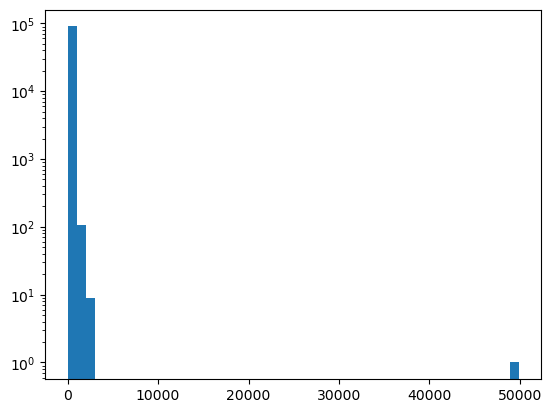

In [74]:
fig, ax = plt.subplots()

ax.hist(df['sum_gamerounds'], bins=50)
ax.set_yscale('log')

plt.show();

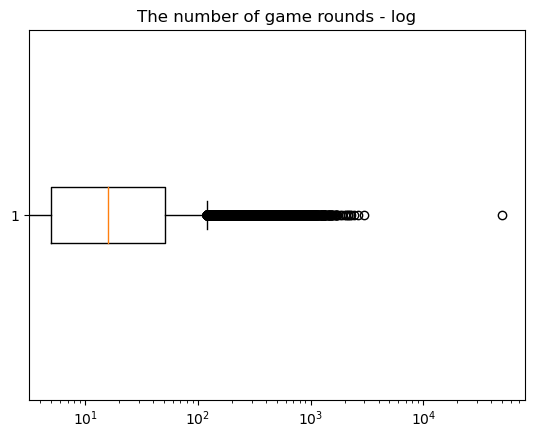

In [1174]:
fig, ax = plt.subplots()

ax.boxplot(df['sum_gamerounds'], vert=False)
ax.set_title('The number of game rounds - log')
ax.set_xscale('log')

plt.show();

# fig.savefig('boxplot.png')

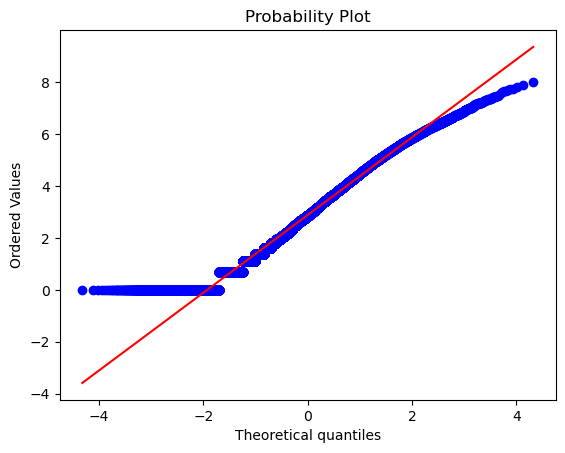

In [64]:
import pylab 
import scipy.stats as stats

measurements = np.log1p(df[df['sum_gamerounds'] < np.max(df['sum_gamerounds'])]['sum_gamerounds'])
stats.probplot(measurements, dist='norm', plot=pylab)
pylab.show()

In [1185]:
max_index = df[df['sum_gamerounds'] == np.max(df['sum_gamerounds'])].index
df2 = df.drop(index=max_index, axis=0)

In [1186]:
df2.max()

userid            9999861
version           gate_40
sum_gamerounds       2961
retention_1          True
retention_7          True
dtype: object

## Подсчет p-value с помощью функции mannwhitneyu

In [1187]:
a = df2[df2['version'] == 'gate_30']['sum_gamerounds']
b = df2[df2['version'] == 'gate_40']['sum_gamerounds']
stats.mannwhitneyu(a, b, alternative='less', method='asymptotic')

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.97455423878383)

## Подсчет p-value вручную

In [1188]:
ab = np.sort(np.concatenate((a, b)))

ranks = stats.rankdata(ab)

a_index = [np.where(i == ab)[0][0] for i in a]
b_index = [np.where(i == ab)[0][0] for i in b]

ars = ranks[a_index].sum()
brs = ranks[b_index].sum()

In [1189]:
ars, brs

(2023308411.5, 2043674354.5)

In [1190]:
na = a.size
nb = b.size

U1 = ars - (na * (na + 1) / 2)
U2 = brs - (nb * (nb + 1) / 2)
U = U2
U1, U2

(1024285761.5, 1009027049.5)

In [1191]:
na, nb

(44699, 45489)

In [1193]:
z = (U - na*nb/2) / np.sqrt(na*nb * (na + nb + 1)/ 12)
p = 1 - stats.norm.cdf(z)
z, p

(-1.9516395886816866, 0.9745094952061889)